In [35]:
# variables
path = 'cropped.png'
size = 500
# darkness = 8
darkness = 14 
# darkness = 20
num_nails = 300
max_lines = 6000

In [36]:
# circle
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def bresenham_line(x1, y1, x2, y2):
    
    """Generate points along a line using Bresenham's Line Algorithm."""
    points = []
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    x, y = x1, y1
    sx = -1 if x1 > x2 else 1
    sy = -1 if y1 > y2 else 1
    if dx > dy:
        err = dx / 2.0
        while x != x2:
            points.append((x, y))
            err -= dy
            if err < 0:
                y += sy
                err += dx
            x += sx
    else:
        err = dy / 2.0
        while y != y2:
            points.append((x, y))
            err -= dx
            if err < 0:
                x += sx
                err += dy
            y += sy        
    points.append((x, y))

    return points




In [38]:
import numpy as np
import math

def generate_line(x0, y0, x1, y1):
    # Calculate the Euclidean distance between the two points
    d = math.floor(math.sqrt((x1-x0)**2 + (y1-y0)**2))
    
    # Generate a series of points between the two points
    xs = np.linspace(x0, x1, d).astype(int)
    ys = np.linspace(y0, y1, d).astype(int)
    
    # Combine xs and ys into a list of tuples
    points = list(zip(xs, ys))
    
    return points


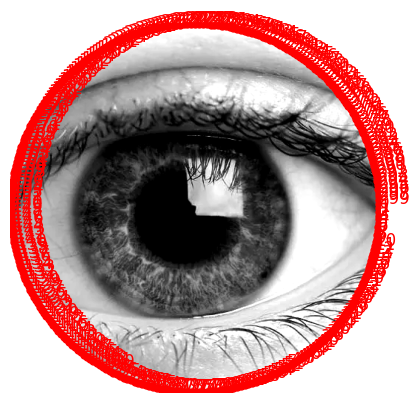

[(499.0, 250.0), (498.94539018523653, 255.2146625509559), (498.78158469461573, 260.4270377785707), (498.5086553786396, 265.634839362799), (498.12672195312655, 270.8357829897466), (497.63595194670006, 276.0275873536457), (497.036560627305, 281.2079751575118), (496.3288109077841, 286.3746741120405), (495.51301323055577, 291.52541793230944), (494.58952543144346, 296.65794733184543), (493.5587525827176, 301.7700110136221), (492.42114681541693, 306.85936665755327), (491.17720712102914, 311.92378190404884), (489.8274791326169, 316.96103533320115), (488.37255488548476, 321.9689174391734), (486.81307255749323, 326.94523159936193), (485.1497161891328, 331.8877950379072), (483.383215383481, 336.79443978313196), (481.5143449861746, 341.6630136184848), (479.54392474553663, 346.49138102657366), (477.4728189530076, 351.27742412587423), (475.30193606403884, 356.0190435997031), (473.03222829961385, 360.7141596170469), (470.66469122857245, 365.36071274484556), (468.2003633309221, 369.9566648513271), (4

In [39]:
def place_nails(image_path, num_nails):
    # Load the image
    image = Image.open(image_path)
    image = np.array(image)
    
    # Create the figure and axes
    fig, ax = plt.subplots()
    
    # Display the image
    ax.imshow(image, cmap='gray')  # set colormap to gray

    # Calculate the coordinates of the nails
    center_x = image.shape[1] / 2
    center_y = image.shape[0] / 2
    radius = min(center_x, center_y) - 1
    
    # Store the nail coordinates
    nails = []
    
    for i in range(num_nails):
        angle = 2 * np.pi * i / num_nails
        x = center_x + radius * np.cos(angle)
        y = center_y + radius * np.sin(angle)
        
        # Store the nail coordinate
        nails.append((x, y))
        
        # Draw the nail number
        ax.text(x, y, str(i), color='red', fontsize=12)
        
        # Draw the nail position
        ax.plot(x, y, marker='o', markersize=5, color='red')
    
    plt.axis('off')  # hide the axes
    plt.show()
    
    # Return the nail coordinates
    return nails


nails = place_nails('gray_crop_contrast_masked.png', num_nails)  # 30 nails for example

print(nails)

In [40]:
def generate_all_lines(nails):
    # Initialize a dictionary to store the lines
    lines = {}

    for i, nail1 in enumerate(nails):
        # Initialize a list to store the lines for this nail
        lines[i] = []

        for j, nail2 in enumerate(nails):
            # Don't generate a line from a nail to itself
            if i != j:
                x1, y1 = nail1
                x2, y2 = nail2

                # Generate the line and store it in the dictionary
                # line = bresenham_line(int(x1), int(y1), int(x2), int(y2))
                line = generate_line(int(x1), int(y1), int(x2), int(y2))
                lines[i].append((j, line))
                
    return lines

lines = generate_all_lines(nails)


In [41]:
imagex = Image.open('gray_crop_contrast_masked.png')
image = np.array(imagex)
error = img_np = np.array(imagex, dtype=np.int16)

In [42]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def draw_lines_from_nail(nail_number, lines, image_path):
    # Create the figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image, cmap='gray')

    # Get the lines for the specified nail
    nail_lines = lines[nail_number]

    for nail, line in nail_lines:
        # Extract the x and y coordinates of the line
        xs, ys = zip(*[point for point in line])

        # Draw the line
        ax.plot(xs, ys, color='red')

    plt.axis('off')  # hide the axes
    plt.show()

In [43]:
def find_darkest_target(image, nail1):
    buff = 20
    # Initialize the darkest nail as the first one and the maximum darkness as 0
    darkest_target_nail, max_darkness = None, float('inf') 

    for target_nail, line in lines[nail1]:
        if abs(nail1 - target_nail) < buff:
            continue
        # Sum the darkness values for this line
        # total_darkness = sum(255 - image[y, x] for (x, y) in line)/ len(line)
        total_darkness = sum(image[y, x] for (x, y) in line)/ len(line)

        # If the total darkness for this nail is greater than the current maximum
        if total_darkness < max_darkness:
            # Update the darkest nail and maximum darkness
            darkest_target_nail, max_darkness = target_nail, total_darkness

    return darkest_target_nail

# Let's test the function with nail number 1 for example
darkest_target = find_darkest_target(image, 1)
print(f"The darkest target from nail 1 is nail {darkest_target}.")

The darkest target from nail 1 is nail 291.


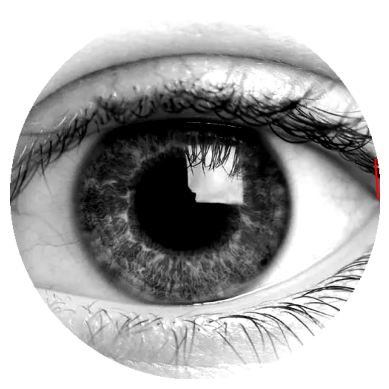

In [44]:
def draw_darkest_line(image_path, lines, nail, target):
    # Create the figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image, cmap='gray')

    # Find the line between the nail and the target
    for target_nail, line in lines[nail]:
        if target_nail == target:
            # If this is the line to the target, draw it
            xs, ys = zip(*[point for point in line])
            ax.plot(xs, ys, 'r')
            break

    plt.axis('off')
    plt.show()

# Find the darkest target from nail 1
darkest_target = find_darkest_target(image, 1)

# Draw the line from nail 1 to its darkest target
draw_darkest_line('gray_crop_contrast_masked.png', lines, 1, darkest_target)


255


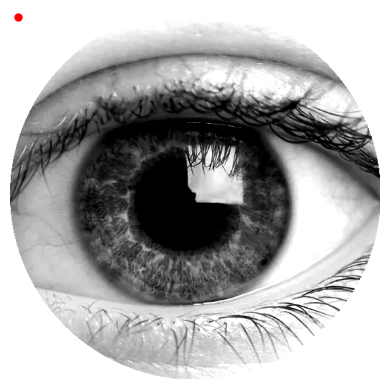

In [45]:

x,y = 10,10
print(image[x,y])
fig, ax = plt.subplots()

ax.imshow(image, cmap='gray')

ax.plot(x, y, marker='o', markersize=5, color='red')
plt.axis('off')  # hide the axes
plt.show()

In [46]:
print(lines[0][0])

(1, [(499, 250), (498, 251), (498, 252), (498, 253), (498, 255)])


In [47]:
def lighten_pixels_on_line(image, line, value):
    for (x, y) in line:
        # Ensure the value doesn't go below 0 or above 255
        # new_value = min(255, max(0, image[y, x] + value))
        new_value =  max(0, image[y, x] + value)
        
        # Update the pixel value in the original image
        image[y, x] = new_value


200 / 6000
400 / 6000
600 / 6000
800 / 6000
1000 / 6000
1200 / 6000
1400 / 6000
1600 / 6000
1800 / 6000
2000 / 6000
2200 / 6000
2400 / 6000
2600 / 6000
2800 / 6000
3000 / 6000
3200 / 6000
3400 / 6000
3600 / 6000
3800 / 6000
4000 / 6000
4200 / 6000
4400 / 6000
4600 / 6000
4800 / 6000
5000 / 6000
5200 / 6000
5400 / 6000
5600 / 6000
5800 / 6000
6000 / 6000


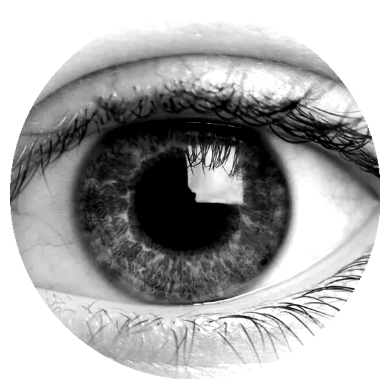

In [48]:

def makePic(start, image):
    count = 0 
    line_path = []
    line_path_4k, line_path_full = [], []
    prev = start
    for i in range(max_lines):
        # calculate best line for each
        # def find_darkest_target(image, lines_from_nail):
        dl = find_darkest_target(image, prev)
        line_a = lines[prev]
        if dl+1 < len(line_a) and line_a[dl+1][0] == dl:
            line_b = line_a[dl+1]
            # print(line_b[0],  end, "+1")
        elif dl-1 > 0 and line_a[dl-1][0] == dl:
            line_b = line_a[dl-1]
            # print(line_b[0],  end, "-1")
        else:
            line_b = line_a[dl]
            # print(line_b[0], end,"0")
        if line_b[0] != dl:
            print("mismatch", line_b[0], dl)
        # print(line_b[0] == dl)
        line_c = line_b[1]
        line_path.append((prev, line_b[0]))
        lighten_pixels_on_line(image,line_c, darkness)
        prev = dl
        count+=1
        if not count % 200:
            print(f"{count} / {max_lines}")
        if not count % 4000:
            line_path_4k = line_path[:]
        
    return line_path_4k, line_path

line_path_4k, line_path_full = makePic(0,error)
fig, ax = plt.subplots()
ax.imshow(image, cmap='gray')


plt.axis('off')  # hide the axes
plt.show()
    

In [49]:
with open('line_path.txt', 'w') as file:
    for item in line_path_full:
        # Convert the tuple to a string and then write it to the file
        file.write(str(item) + '\n')

In [50]:
def darken_pixels_on_line(image, line, value):
    for (x, y) in line:
        # Ensure the value doesn't go below 0 or above 255
        # new_value = max(0, min(255, image[y, x] - value))
        new_value = max(0, min(255, image[y, x] - value))
        
        # Update the pixel value in the original image
        image[y, x] = new_value

0


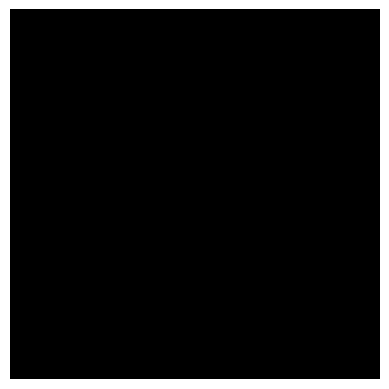

In [51]:
canvas = np.full_like(image, fill_value=0)
fig, ax = plt.subplots()
ax.imshow(canvas, cmap='gray')
x,y = 150,150
print(canvas[x,y])
plt.axis('off')  # hide the axes
plt.show()
    

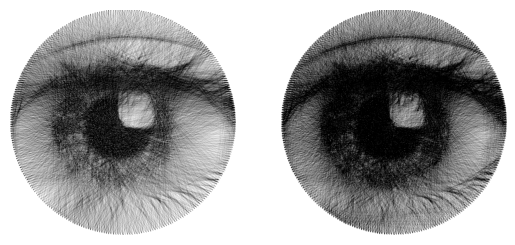

In [52]:
def trace_lines(image, line_path):
    # Create a blank canvas of the same size as the image
    canvas = np.full_like(image, fill_value=255)
    for start, end in line_path:
        line_a = lines[start]
        if end+1 < len(line_a) and line_a[end+1][0] == end:
            line_b = line_a[end+1]
        elif end-1 > 0 and line_a[end-1][0] == end:
            line_b = line_a[end-1]
        else:
            line_b = line_a[end]
          
        line_c = line_b[1]
        darken_pixels_on_line(canvas,line_c, darkness)
    return canvas

canvas_full = trace_lines(image, line_path_full)
canvas_4k = trace_lines(image, line_path_4k)

fig, (ax1, ax2) = plt.subplots(1, 2) # 1 row, 2 columns

ax1.imshow(canvas_4k, cmap='gray')
ax1.axis('off')  # hide the axes

ax2.imshow(canvas_full, cmap='gray')
ax2.axis('off')  # hide the axes

plt.show()
    

In [53]:
def getpoints(line_path):
    res = []
    for i,j in line_path:
        res.append(i)
    return res

# x = getpoints()
# print(x)

[0, [122, 217]]


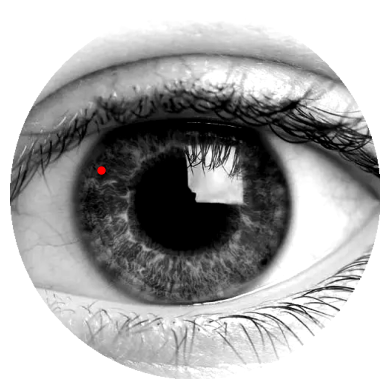

In [54]:
image = Image.open('gray_crop_contrast_masked.png')
image = np.array(image)
m = [255, [0,0]]
for i in range(size):
    for j in range(size):
        if image[i,j] < m[0]:
            m[0] = image[i,j]
            m[1] = [i,j]
print(m)
        
x,y = m[1]
fig, ax = plt.subplots()

ax.imshow(image, cmap='gray')
ax.plot(x, y, marker='o', markersize=5, color='red')
plt.axis('off')  # hide the axes
plt.show()